In [97]:
from math import sin,cos,exp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Given function to numerically differentiate
def f(x):
    return exp(-x)*sin(x)

# Computing the exact derivative
def d2f(x):
    return -2 * exp(-x) * cos(x)

In [98]:
# Declaring lists to store the error vs h values
E=[]
H=[]

# For k = 100,101,...300
for k in range(100,301):
    
    h=pow(10,-k/100)
    
    x1, x4 = 0.0, h
    x2, x3 = 0, 0
    
    while(x2==x3):
        # To keep generating random numbers until x2 and x3 are different
        x2, x3=np.random.uniform(low=x1, high=x4, size=2)[0],np.random.uniform(low=x1, high=x4, size=2)[1]
    
    # Always storing the smaller value in x2
    if(x2>x3):
        x2,x3=x3,x2
    
    x = [x1, x2, x3, x4]
    y = [f(i) for i in x]
    # Appending the h and absolute error magnitude values
    
    # Constructing matrix with coefficients to calculate a,b,c,d
    temp = [i-x[1] for i in x]
    matrix = [[1,1,1,1],[i for i in temp],[pow(i,2) for i in temp],[pow(i,3) for i in temp]]
    b = [0,0,2,0]
    
    soln = np.linalg.inv(matrix).dot(np.array(b))
    
    f2x = np.dot(soln,y)
    f_2x = d2f(x2)
    
    H.append(h)
    E.append(abs(f2x-f_2x))

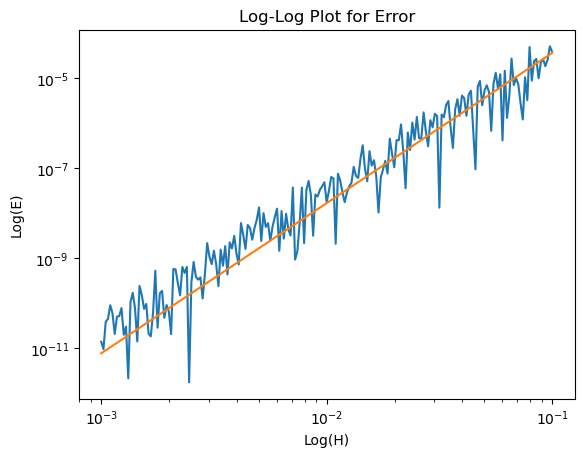

In [103]:
Cp=[]
def model(x, C, p):
    Cp.append([f'{C:.3}', f'{p:.3}'])
    return C*np.power(x, p)

opt, cov = sp.optimize.curve_fit(model, H, E) 

model_val = model (H, *opt)

# Plotting the error and linear regression line:
plt.loglog(H,E,label="Error")
plt.loglog(H,model_val,label="Linear regression curve")
plt.xlabel('Log(H)')
plt.ylabel('Log(E)')
plt.title('Log-Log Plot for Error')

# Creating log-log plot
plt.scatter(xlog, ylog, s=3)

In [104]:
# Values of C and p upto 3 significant figures
Cp

[['1.0', '1.0'],
 ['1.0', '1.0'],
 ['1.0', '1.0'],
 ['1.0', '1.0'],
 ['1.0', '1.0'],
 ['0.000661', '1.0'],
 ['0.000661', '1.0'],
 ['0.000661', '1.0'],
 ['0.000661', '1.26'],
 ['0.000661', '1.26'],
 ['0.000661', '1.26'],
 ['0.00132', '1.79'],
 ['0.00132', '1.79'],
 ['0.00132', '1.79'],
 ['0.00546', '2.93'],
 ['0.00205', '1.92'],
 ['0.00205', '1.92'],
 ['0.00205', '1.92'],
 ['0.00365', '2.19'],
 ['0.00296', '2.05'],
 ['0.00296', '2.05'],
 ['0.00296', '2.05'],
 ['0.00517', '2.32'],
 ['0.00407', '2.17'],
 ['0.00407', '2.17'],
 ['0.00407', '2.17'],
 ['0.00671', '2.41'],
 ['0.00547', '2.28'],
 ['0.00547', '2.28'],
 ['0.00547', '2.28'],
 ['0.00885', '2.51'],
 ['0.00717', '2.39'],
 ['0.00717', '2.39'],
 ['0.00717', '2.39'],
 ['0.0112', '2.6'],
 ['0.00926', '2.49'],
 ['0.00926', '2.49'],
 ['0.00926', '2.49'],
 ['0.0142', '2.69'],
 ['0.0117', '2.58'],
 ['0.0117', '2.58'],
 ['0.0117', '2.58'],
 ['0.0174', '2.76'],
 ['0.0146', '2.67'],
 ['0.0146', '2.67'],
 ['0.0146', '2.67'],
 ['0.0214', '2.84'],